# Introduction
It is pivotal to encourage and support worldwide education, especially those of younger generations. There are some challenges that play an subtle but influential role in affecting children's ability to get a good education. Good education can be captured differently but in this analysis, the test scores (math, reading, and writing) will be the quantitative values which will measure children's academic performance. Some factors that influence children's ability to learn in schools could stem from variety of reasons ranging from parents' education level, the family's financial status, ethnicity, and so forth. The purpose of this jupyter notebook is to predict features that can predict what factors could influence students' academic performances.

# Information about the data
This dataset is fictional. This contains each student's performance in Math, Reading, and Writing score. The dataset is fictional and contains the variety of personal, social, and economic factors that may influence the test scores. 

# Preprocessing the data
- check if there are any nulls within the columns

In [157]:
## any nulls?
csv = pd.read_csv('data/StudentsPerformance.csv')
csv.isnull().sum()

## rename some columns
csv.rename(columns={'race/ethnicity':'race',
                    'parental level of education': 'parent_education',
                    'test preparation course': 'test_prep_course',
                    'math score':'math_score',
                    'reading score':'reading_score',
                    'writing score':'writing_score'},
           inplace = True)

,gender,race,parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Explore the data
- examine the distribution of the different columns and their average values
- look for any correlations between some of the test scores
    - for example, writing and reading seem to use similar kinds of qualtitative reasoning

In [79]:
## import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
## look at the distribution of the dataset
csv.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<AxesSubplot:>

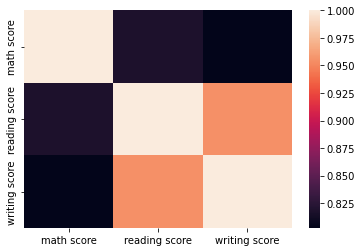

In [10]:
## any relationship between some of the test scores?
corr = csv.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Simple EDA

In [26]:
csv.head()

,gender,race,parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


female    518
male      482
Name: gender, dtype: int64


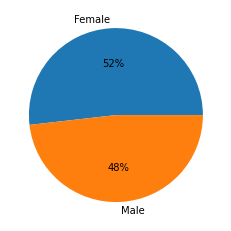

In [23]:
## Gender?
genders = csv['gender'].value_counts()
plt.figure()
plt.pie(genders, labels=['Female', 'Male'], autopct='%1.0f%%')
plt.show()

Relatively equal proportion of female and male students (52% Female, 48% Male)

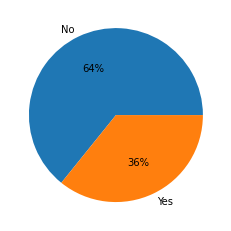

In [45]:
## test prep?
prep = csv['test_prep_course'].value_counts()
plt.figure()
plt.pie(prep, labels=['No', 'Yes'], autopct='%1.0f%%')
plt.show()

Higher proportion of students who did not complete test prep than did (64% did, 36% did not).

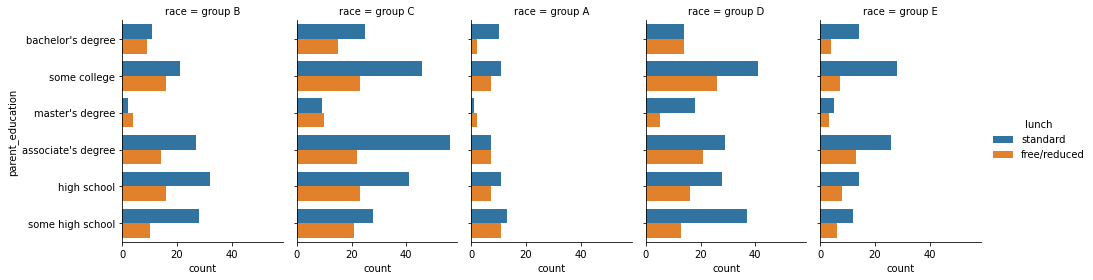

In [42]:
## break down parental education count by race and lunch price reduction
sns.catplot(y='parent_education',
              hue='lunch', 
              col='race',
            kind='count',
            height=4,
            aspect=0.7,
              data=csv)

Group A seems to have similar count of standard and free/reduced lunches despite parents having good education degrees like associate's and master's. However, students of parents in group A with just bachelor's degree are not affected as much with requiring lunch reduction, suggesting that these socioeconomic and educational factors play out differently on needing government assistance. The different effect on lunch reduction depending on race and parental education suggests the different interplays different factors can have, highlighting the social term intersectionality described by Crenshaw.

<AxesSubplot:xlabel='parent_education'>

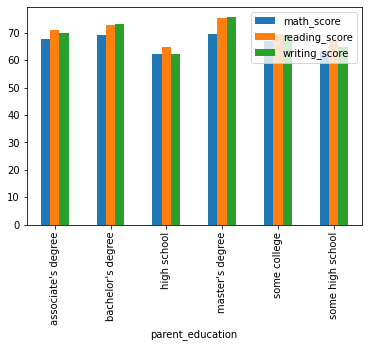

In [55]:
## parental education on students' test scores
fig1 = csv.groupby('parent_education').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
fig1.plot.bar()

In general, the students who had parents with high school educations seem to have overall lower test scores.

<AxesSubplot:xlabel='test_prep_course'>

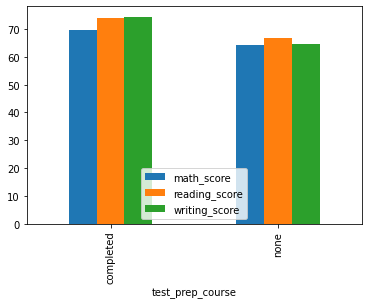

In [59]:
## test prep on students' test scores
fig2 = csv.groupby('test_prep_course').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
fig2.plot.bar()

## Preprocessing for ML

In [77]:
X=csv[['gender','race','parent_education','lunch','test_prep_course','reading_score','writing_score']]
Y=csv['math_score']

## dummy variables
X = pd.get_dummies(data=X, drop_first = True)
X.head()

,reading_score,writing_score,gender_male,race_group B,race_group C,race_group D,race_group E,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,lunch_standard,test_prep_course_none
0,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,78,75,1,0,1,0,0,0,0,0,1,0,1,1


In [153]:
## model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

## Ready to test out the different models!

## 1. Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor(n_estimators=30, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
forest.score(X_test, y_test) ## accuracy

0.8200357061176737

## 2. Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test, y_test)

0.8539032390585746

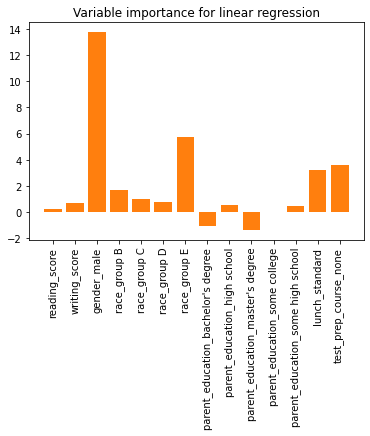

In [136]:
## feature importance
importance = lm.coef_
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.bar([x for x in X_train.columns], importance)
plt.title('Variable importance for linear regression')
plt.xticks(rotation=90)

plt.show()

28.706552557380675


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math_score'>

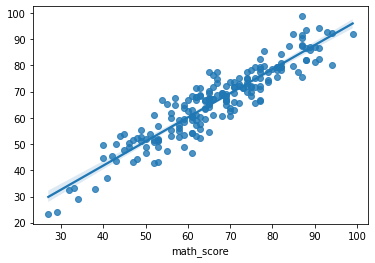

In [145]:
## mean square error
from sklearn.metrics import mean_squared_error
predictions = lm.predict(X_test)
print(mean_squared_error(y_test, predictions))
sns.regplot(y_test,predictions)

Other types of regularization. Normally with linear regression, we want to reduce the prediction against the expected. But sometimes, the wrong coefficients get selected so we use regularization to reduce highly influential but wrongly selected coefficients. Two types of regularization will be used in this example: lasso and ridge. Lasso is a type of regularization where a penalty that's equal to absolute value of magnitude of coefficient (sometimes leads to feature reduction). Ridge regularization is where the penalty equals the square of the magnitude of the coefficient (this takes in the alpha values to determine penalty size).

## 3. Lasso

In [146]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

In [155]:
print(ls.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))

0.8199832747015308
MSE FOR LASSO: 35.37148635389621


## 4. Ridge

In [164]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [165]:
print(ridge.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))

0.8546856602576229
28.552814615979678


## Conclusion

This dataset was fictional and this presented a good chance to explore the various socioeconomic, sex, race, and other factors that could influence students' test scores (math, reading, and writing). As a general pattern, the education level of the parents and students' participation in prep classes affected math, writing, and reading scores. The higher the parents' education level and the more students took prep classes, the higher their scores. This makes sense as if parents are well educated, there is more of an emphasis in education and this value is passed throughout the generation. The participation in prep classes increasing scores also make sense as practice and repetition makes perfect. The more people dedicate time on practice, the better they get via 10,000 hours rule, highlighting the importance of good habits and time management. The ability for parents to send their children to prep classes subtly highlights the socioeconomic status as well as parents with additional flexible income to spend can afford such luxuries. 
Next step was seeing if some features could predict the students' math scores. All the features were used as features for predictions where the categorical columns were one-hot encoded into numerics to feed into the model. Four different types of models were used: random forest, linear regression, lasso, and ridge. The linear regression and ridge had highest accuracy score of around 0.85. The other models came close to 0.80. For linear regressions, the gender being Male, race group E, and participation in test prep had highest impact. The gender playing pivotal part in predicting math test score was a bit disheartening as there have been evidence repeatedly that there is not a significant difference in intelligence between both genders. This suggests that we should do a better job at reducing the gender discrimination at younger age. There has been studies where when females are made aware of their gender before a test, they tend to score significantly lower than if they were not aware, implying that this subtle awareness cna have significant impact on behavior and anxiety to reduce score. 
Overall this was an interesting analysis and while there are many models, linear regression continues to be a powerful model. There are other, more mysterious models like blackbox but these remain unexplainable and simple is a good way to go for building models when the relationship is linear.